# Stargazing
### Abril dR.

# *Instalar Dependencias*

In [111]:
!pip install tensorflow opencv-python matplotlib

In [112]:
pip install keras-visualizer

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras_visualizer import visualizer

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

# *Definir Clases y Crear Directorios*

In [ ]:
# Lista de clases
classes = ['star', 'planet', 'nebula', 'blackhole', 'meteor-asteroid', 'galaxy']

In [ ]:
# Directorio principal
OG_dataset = '/content/dataset/'
os.makedirs(OG_dataset, exist_ok=True)

In [ ]:
# Crear carpetas para cada clase
for class_name in classes:
    class_folder = os.path.join(OG_dataset, class_name)
    os.makedirs(class_folder, exist_ok=True)

In [ ]:
# Listar contenido del directorio principal
data_dir_list = os.listdir(OG_dataset)
print(data_dir_list)

['meteor-asteroid', 'planet', 'star', 'nebula', 'galaxy', 'blackhole']


In [ ]:
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)

['meteor-asteroid', 'planet', 'star', 'nebula', 'galaxy', 'blackhole']


In [ ]:
testing_data_folder = '/content/testing-data/'
os.makedirs(testing_data_folder, exist_ok=True)

for class_name in classes:
    class_folder = os.path.join(testing_data_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)

In [ ]:
data_dir = ('/content/dataset')

In [ ]:
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)

In [ ]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/celestial-bodies-data/'
os.mkdir(base_dir)

# *Excluir Imágenes*

In [ ]:
image_exts = ['jpeg', '.jpg', 'bmp', 'png', 'gif']

In [ ]:
import os
import imghdr
import cv2

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try :
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts :
                print('Image not in ext list {}' .format(image_path))
                os.remove(image_path)
        except Exception as e :
            print('Issue with image {}' .format(image_path))

Image not in ext list /content/dataset/meteor-asteroid/skynews-asteroid-bennu-image_4697184.jpg
Image not in ext list /content/dataset/meteor-asteroid/13.8-Death-From-the-Skies_Lead.jpg
Image not in ext list /content/dataset/meteor-asteroid/.DS_Store
Image not in ext list /content/dataset/planet/gj357_dthm.jpg
Image not in ext list /content/dataset/planet/Earth-and-Exoplanet-Kepler-138-d-Cross-Sections-scaled.jpg
Image not in ext list /content/dataset/planet/5063392410_171f23ef25_b.jpg
Image not in ext list /content/dataset/planet/.DS_Store
Image not in ext list /content/dataset/star/.DS_Store
Image not in ext list /content/dataset/star/NASA-s-Hubble-telescope-shares-stunning-images-of-a-star-s-explosion_186a2db032b_large.jpg
Image not in ext list /content/dataset/nebula/.DS_Store
Image not in ext list /content/dataset/galaxy/310px-NGC_4414_28NASA-med29.jpg
Image not in ext list /content/dataset/galaxy/nasa-galaxy-pictures-70kbz3omj6qrevn2.jpg
Image not in ext list /content/dataset/gal

# *Train, Validation Split*

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
# Crear directorios para cada clase en el conjunto de entrenamiento
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

# Crear directorios para cada clase en el conjunto de validación
for class_name in classes:
    class_dir = os.path.join(validation_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else :
            print(filename + "is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
STARS_SOURCE_DIR = '/content/dataset/star/'
TRAINING_STARS_DIR = '/content/celestial-bodies-data/train/star/'
VALID_STARS_DIR = '/content/celestial-bodies-data/validation/star/'

PLANETS_SOURCE_DIR = '/content/dataset/planet/'
TRAINING_PLANETS_DIR = '/content/celestial-bodies-data/train/planet/'
VALID_PLANETS_DIR = '/content/celestial-bodies-data/validation/planet/'

NEBULAS_SOURCE_DIR = '/content/dataset/nebula/'
TRAINING_NEBULAS_DIR = '/content/celestial-bodies-data/train/nebula/'
VALID_NEBULAS_DIR = '/content/celestial-bodies-data/validation/nebula/'

GALAXIES_SOURCE_DIR = '/content/dataset/galaxy/'
TRAINING_GALAXIES_DIR = '/content/celestial-bodies-data/train/galaxy/'
VALID_GALAXIES_DIR = '/content/celestial-bodies-data/validation/galaxy/'

BLACKHOLES_SOURCE_DIR = '/content/dataset/blackhole/'
TRAINING_BLACKHOLES_DIR = '/content/celestial-bodies-data/train/blackhole/'
VALID_BLACKHOLES_DIR = '/content/celestial-bodies-data/validation/blackhole/'

ASTEROIDS_METEORS_SOURCE_DIR = '/content/dataset/meteor-asteroid/'
TRAINING_ASTEROIDS_METEORS_DIR = '/content/celestial-bodies-data/train/meteor-asteroid/'
VALID_ASTEROIDS_METEORS_DIR = '/content/celestial-bodies-data/validation/meteor-asteroid/'

In [ ]:
import random
from shutil import copyfile

In [132]:
split_size = .85

In [133]:
split_data(STARS_SOURCE_DIR, TRAINING_STARS_DIR, VALID_STARS_DIR, split_size)
split_data(PLANETS_SOURCE_DIR, TRAINING_PLANETS_DIR, VALID_PLANETS_DIR, split_size)
split_data(NEBULAS_SOURCE_DIR, TRAINING_NEBULAS_DIR, VALID_NEBULAS_DIR, split_size)
split_data(GALAXIES_SOURCE_DIR, TRAINING_GALAXIES_DIR, VALID_GALAXIES_DIR, split_size)
split_data(BLACKHOLES_SOURCE_DIR, TRAINING_BLACKHOLES_DIR, VALID_BLACKHOLES_DIR, split_size)
split_data(ASTEROIDS_METEORS_SOURCE_DIR, TRAINING_ASTEROIDS_METEORS_DIR, VALID_ASTEROIDS_METEORS_DIR, split_size)

## *Distribución de Imágenes*

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

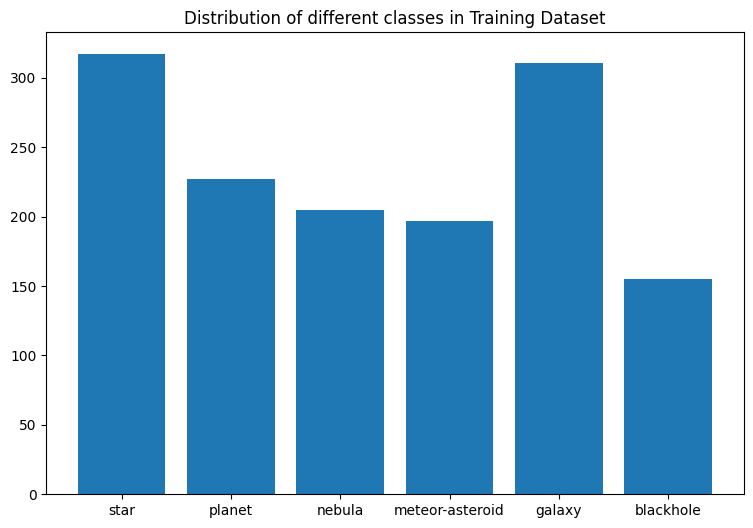

In [135]:
image_folder = ['star', 'planet', 'nebula', 'meteor-asteroid', 'galaxy', 'blackhole']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/celestial-bodies-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [136]:
for i in ['star', 'planet', 'nebula', 'meteor-asteroid', 'galaxy', 'blackhole']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/celestial-bodies-data/train/'+i+'/'))))

Training star images are: 317
Training planet images are: 227
Training nebula images are: 205
Training meteor-asteroid images are: 197
Training galaxy images are: 311
Training blackhole images are: 155


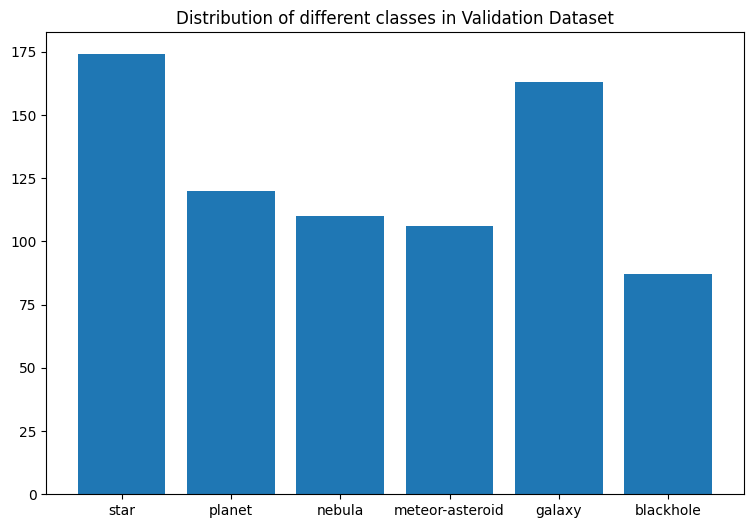

In [137]:
image_folder = ['star', 'planet', 'nebula', 'meteor-asteroid', 'galaxy', 'blackhole']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/celestial-bodies-data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [138]:
for i in ['star', 'planet', 'nebula', 'meteor-asteroid', 'galaxy', 'blackhole']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/celestial-bodies-data/validation/'+i+'/'))))

Validation star images are: 174
Validation planet images are: 120
Validation nebula images are: 110
Validation meteor-asteroid images are: 106
Validation galaxy images are: 163
Validation blackhole images are: 87


In [139]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [140]:
img_width=256; img_height=256
batch_size=16

# *Data Augmentation*

In [141]:
TRAINING_DIR = '/content/celestial-bodies-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1408 images belonging to 6 classes.


In [142]:
VALIDATION_DIR = '/content/celestial-bodies-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width))

Found 760 images belonging to 6 classes.


In [143]:
TEST_DIR = '/content/testing-data/'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  target_size=(img_height, img_width))

Found 28 images belonging to 6 classes.


In [144]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

# *Modelo*

In [145]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 58, 58, 64)       

### *Visualización del modelo*

In [146]:
visualizer(model, file_format='png')

# *Entrenar Modelo*

In [147]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [148]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
88/88 [==============================] - ETA: 0s - loss: 1.7669 - accuracy: 0.2266

88/88 [==============================] - 33s 341ms/step - loss: 1.7669 - accuracy: 0.2266 - val_loss: 1.7248 - val_accuracy: 0.2908
Epoch 2/30
88/88 [==============================] - ETA: 0s - loss: 1.6187 - accuracy: 0.2990

88/88 [==============================] - 30s 342ms/step - loss: 1.6187 - accuracy: 0.2990 - val_loss: 1.5525 - val_accuracy: 0.3237
Epoch 3/30
88/88 [==============================] - ETA: 0s - loss: 1.5004 - accuracy: 0.3260

88/88 [==============================] - 32s 362ms/step - loss: 1.5004 - accuracy: 0.3260 - val_loss: 1.4958 - val_accuracy: 0.2921
Epoch 4/30
88/88 [==============================] - ETA: 0s - loss: 1.4621 - accuracy: 0.3310

88/88 [==============================] - 30s 347ms/step - loss: 1.4621 - accuracy: 0.3310 - val_loss: 1.5353 - val_accuracy: 0.3789
Epoch 5/30
88/88 [==============================] - ETA: 0s - loss: 1.4538 - accuracy: 0.3366

88/88 [==============================] - 30s 344ms/step - loss: 1.4538 - accuracy: 0.3366 - val_loss: 1.3397 - val_accuracy: 0.3921
Epoch 6/30
88/88 [==============================] - ETA: 0s - loss: 1.4172 - accuracy: 0.3530

88/88 [==============================] - 30s 345ms/step - loss: 1.4172 - accuracy: 0.3530 - val_loss: 1.3608 - val_accuracy: 0.3829
Epoch 7/30
88/88 [==============================] - ETA: 0s - loss: 1.3940 - accuracy: 0.4077

88/88 [==============================] - 30s 344ms/step - loss: 1.3940 - accuracy: 0.4077 - val_loss: 1.4018 - val_accuracy: 0.3303
Epoch 8/30
88/88 [==============================] - ETA: 0s - loss: 1.4222 - accuracy: 0.3544

88/88 [==============================] - 32s 368ms/step - loss: 1.4222 - accuracy: 0.3544 - val_loss: 1.3471 - val_accuracy: 0.3776
Epoch 9/30
88/88 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.3764

88/88 [==============================] - 30s 343ms/step - loss: 1.3890 - accuracy: 0.3764 - val_loss: 1.2823 - val_accuracy: 0.4039
Epoch 10/30
88/88 [==============================] - ETA: 0s - loss: 1.3623 - accuracy: 0.3707

88/88 [==============================] - 30s 345ms/step - loss: 1.3623 - accuracy: 0.3707 - val_loss: 1.2959 - val_accuracy: 0.4066
Epoch 11/30
88/88 [==============================] - ETA: 0s - loss: 1.3507 - accuracy: 0.3956

88/88 [==============================] - 30s 345ms/step - loss: 1.3507 - accuracy: 0.3956 - val_loss: 1.2771 - val_accuracy: 0.3934
Epoch 12/30
88/88 [==============================] - ETA: 0s - loss: 1.3284 - accuracy: 0.3899

88/88 [==============================] - 32s 368ms/step - loss: 1.3284 - accuracy: 0.3899 - val_loss: 1.3291 - val_accuracy: 0.3987
Epoch 13/30
88/88 [==============================] - ETA: 0s - loss: 1.3265 - accuracy: 0.4070

88/88 [==============================] - 30s 344ms/step - loss: 1.3265 - accuracy: 0.4070 - val_loss: 1.2416 - val_accuracy: 0.4408
Epoch 14/30
88/88 [==============================] - ETA: 0s - loss: 1.3076 - accuracy: 0.4148

88/88 [==============================] - 30s 346ms/step - loss: 1.3076 - accuracy: 0.4148 - val_loss: 1.2556 - val_accuracy: 0.4276
Epoch 15/30
88/88 [==============================] - ETA: 0s - loss: 1.2988 - accuracy: 0.4105

88/88 [==============================] - 30s 343ms/step - loss: 1.2988 - accuracy: 0.4105 - val_loss: 1.2645 - val_accuracy: 0.4368
Epoch 16/30
88/88 [==============================] - ETA: 0s - loss: 1.3240 - accuracy: 0.4055

88/88 [==============================] - 30s 340ms/step - loss: 1.3240 - accuracy: 0.4055 - val_loss: 1.3063 - val_accuracy: 0.3776
Epoch 17/30
88/88 [==============================] - ETA: 0s - loss: 1.3440 - accuracy: 0.4134

88/88 [==============================] - 30s 342ms/step - loss: 1.3440 - accuracy: 0.4134 - val_loss: 1.2506 - val_accuracy: 0.4250
Epoch 18/30
88/88 [==============================] - ETA: 0s - loss: 1.2940 - accuracy: 0.4297

88/88 [==============================] - 30s 346ms/step - loss: 1.2940 - accuracy: 0.4297 - val_loss: 1.2556 - val_accuracy: 0.4395
Epoch 19/30
88/88 [==============================] - ETA: 0s - loss: 1.2766 - accuracy: 0.4332

88/88 [==============================] - 30s 343ms/step - loss: 1.2766 - accuracy: 0.4332 - val_loss: 1.2368 - val_accuracy: 0.4724
Epoch 20/30
88/88 [==============================] - ETA: 0s - loss: 1.2736 - accuracy: 0.4197

88/88 [==============================] - 30s 344ms/step - loss: 1.2736 - accuracy: 0.4197 - val_loss: 1.2061 - val_accuracy: 0.4750
Epoch 21/30
88/88 [==============================] - ETA: 0s - loss: 1.2506 - accuracy: 0.4673

88/88 [==============================] - 30s 342ms/step - loss: 1.2506 - accuracy: 0.4673 - val_loss: 1.1809 - val_accuracy: 0.4908
Epoch 22/30
88/88 [==============================] - ETA: 0s - loss: 1.2736 - accuracy: 0.4311

88/88 [==============================] - 30s 337ms/step - loss: 1.2736 - accuracy: 0.4311 - val_loss: 1.1952 - val_accuracy: 0.4763
Epoch 23/30
88/88 [==============================] - ETA: 0s - loss: 1.2443 - accuracy: 0.4425

88/88 [==============================] - 31s 348ms/step - loss: 1.2443 - accuracy: 0.4425 - val_loss: 1.2271 - val_accuracy: 0.4566
Epoch 24/30
88/88 [==============================] - ETA: 0s - loss: 1.2715 - accuracy: 0.4325

88/88 [==============================] - 30s 342ms/step - loss: 1.2715 - accuracy: 0.4325 - val_loss: 1.1876 - val_accuracy: 0.4592
Epoch 25/30
88/88 [==============================] - ETA: 0s - loss: 1.2137 - accuracy: 0.4759

88/88 [==============================] - 31s 353ms/step - loss: 1.2137 - accuracy: 0.4759 - val_loss: 1.2124 - val_accuracy: 0.4724
Epoch 26/30
88/88 [==============================] - ETA: 0s - loss: 1.2268 - accuracy: 0.4574

88/88 [==============================] - 32s 366ms/step - loss: 1.2268 - accuracy: 0.4574 - val_loss: 1.2180 - val_accuracy: 0.4842
Epoch 27/30
88/88 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.4773

88/88 [==============================] - 33s 381ms/step - loss: 1.1932 - accuracy: 0.4773 - val_loss: 1.1823 - val_accuracy: 0.4803
Epoch 28/30
88/88 [==============================] - ETA: 0s - loss: 1.1889 - accuracy: 0.4737

88/88 [==============================] - 33s 374ms/step - loss: 1.1889 - accuracy: 0.4737 - val_loss: 1.1943 - val_accuracy: 0.4842
Epoch 29/30
88/88 [==============================] - ETA: 0s - loss: 1.2097 - accuracy: 0.4638

88/88 [==============================] - 33s 381ms/step - loss: 1.2097 - accuracy: 0.4638 - val_loss: 1.1563 - val_accuracy: 0.4724
Epoch 30/30
88/88 [==============================] - ETA: 0s - loss: 1.1613 - accuracy: 0.4957

88/88 [==============================] - 32s 369ms/step - loss: 1.1613 - accuracy: 0.4957 - val_loss: 1.1066 - val_accuracy: 0.5211


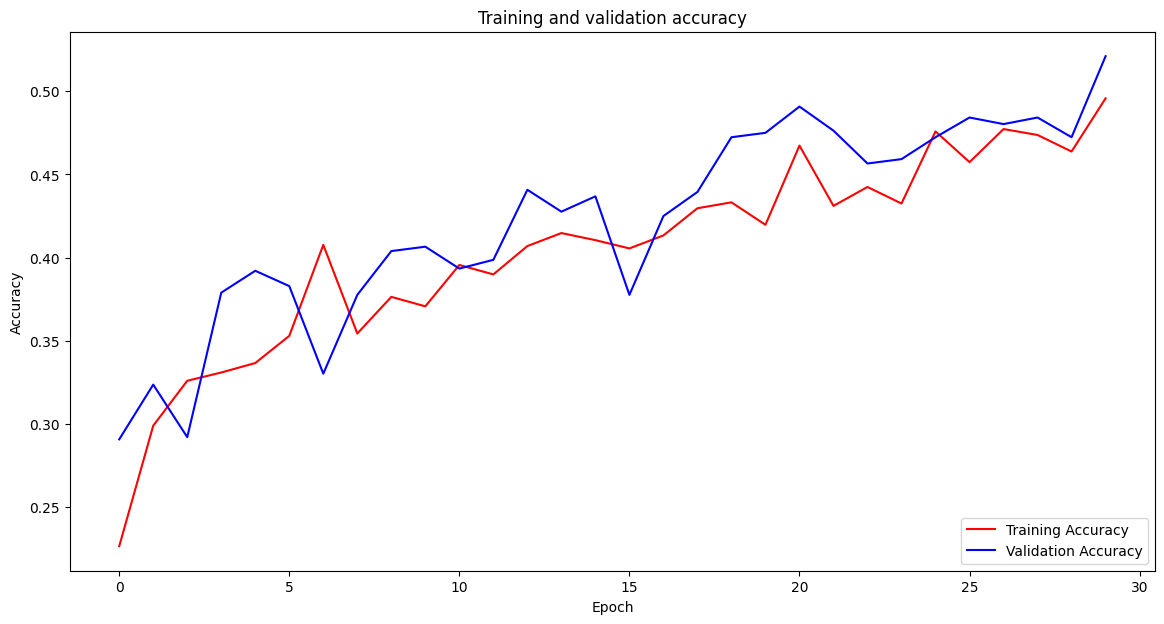

In [161]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

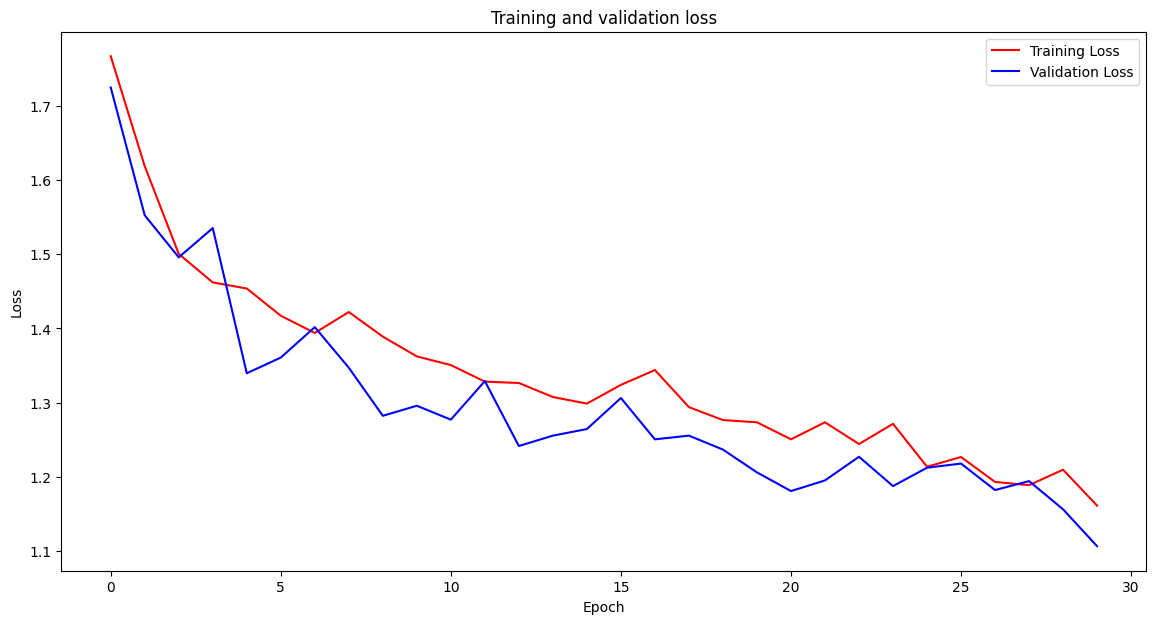

In [162]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [163]:
# performance on test data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

# *Test Evaluación*

In [164]:
test_data = '/content/testing-data/'

In [165]:
# Crea un generador de flujo de datos para las imágenes de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

In [166]:
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_height, img_width),
    batch_size=20,
    class_mode='categorical'
)

Found 28 images belonging to 6 classes.


In [167]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

2/2 [==============================] - 0s 28ms/step - loss: 1.0075 - accuracy: 0.5357
Test Accuracy: 0.5357142686843872
Test Loss: 1.0074573755264282


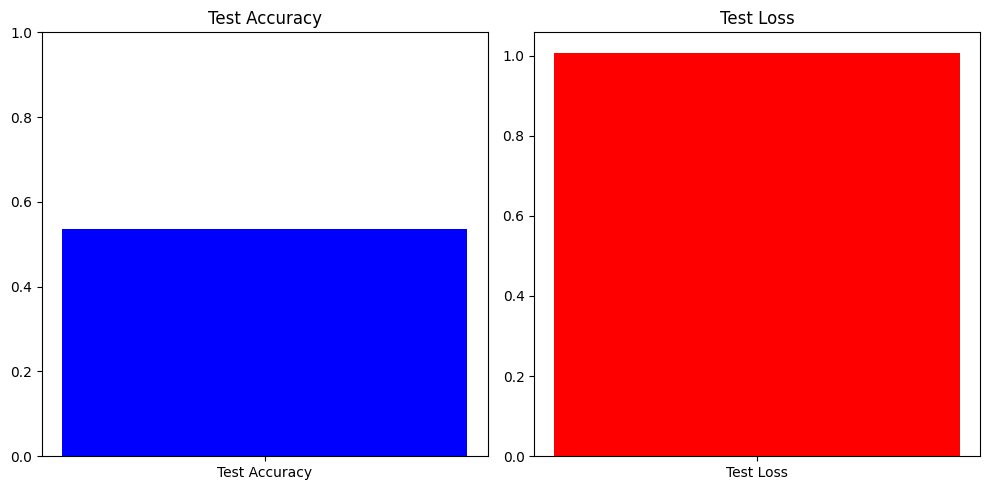

In [168]:
# Gráfico de barras para la precisión y la pérdida
plt.figure(figsize=(10, 5))

# Gráfico de barras para la precisión
plt.subplot(1, 2, 1)
plt.bar(['Test Accuracy'], [test_accuracy], color='blue')
plt.title('Test Accuracy')
plt.ylim([0, 1])

# Gráfico de barras para la pérdida
plt.subplot(1, 2, 2)
plt.bar(['Test Loss'], [test_loss], color='red')
plt.title('Test Loss')

plt.tight_layout()
plt.show()

2/2 [==============================] - 0s 70ms/step


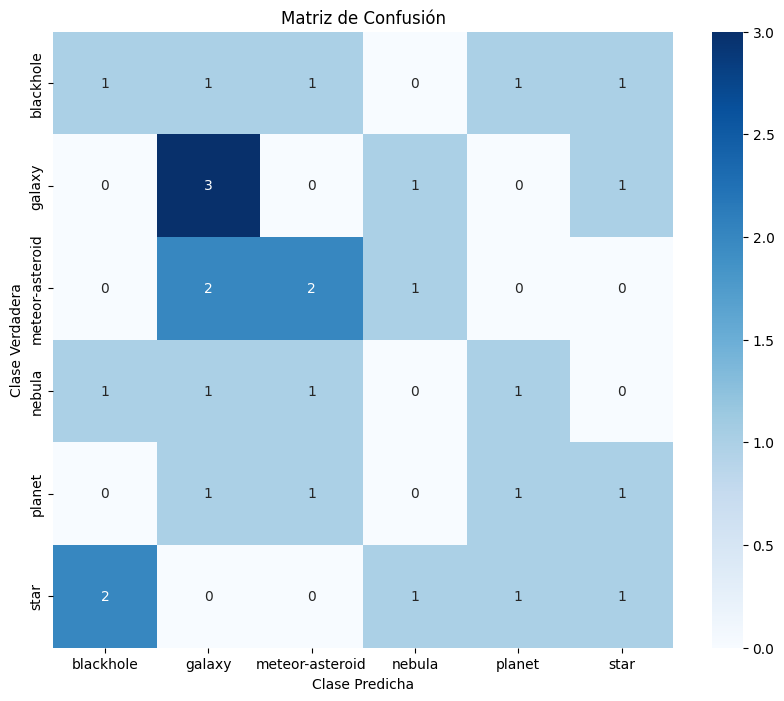

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de prueba
predictions = model.predict(test_generator)

# Convertir las predicciones y etiquetas a clases predichas y verdaderas
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = test_generator.classes

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

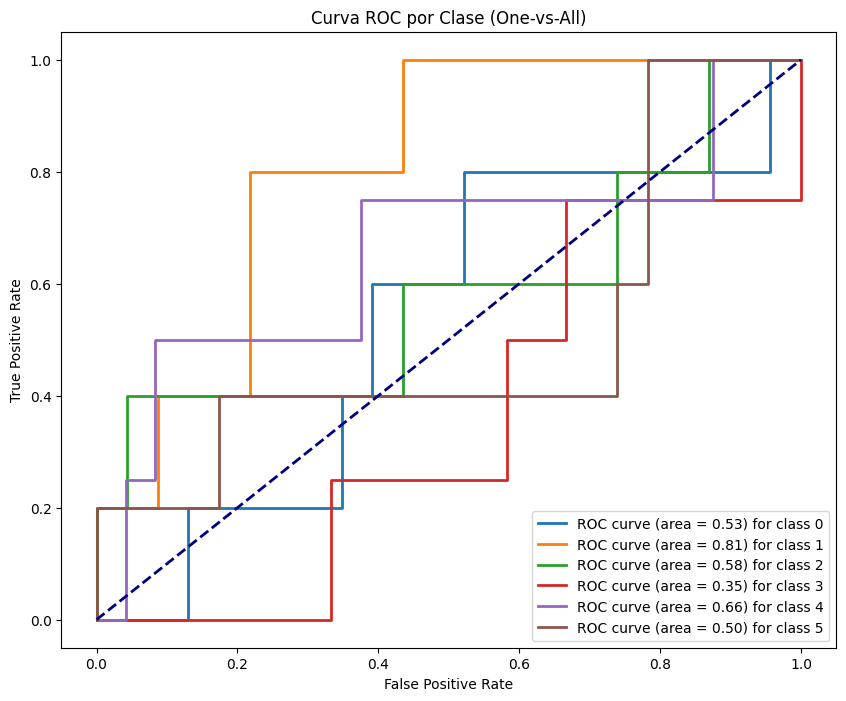

In [170]:
from sklearn.preprocessing import label_binarize

# Convertir las etiquetas a formato binario
y_true_bin = label_binarize(y_true_classes, classes=np.unique(y_true_classes))

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico de la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Clase (One-vs-All)')
plt.legend(loc='lower right')
plt.show()


In [171]:
from tensorflow.keras.utils import plot_model

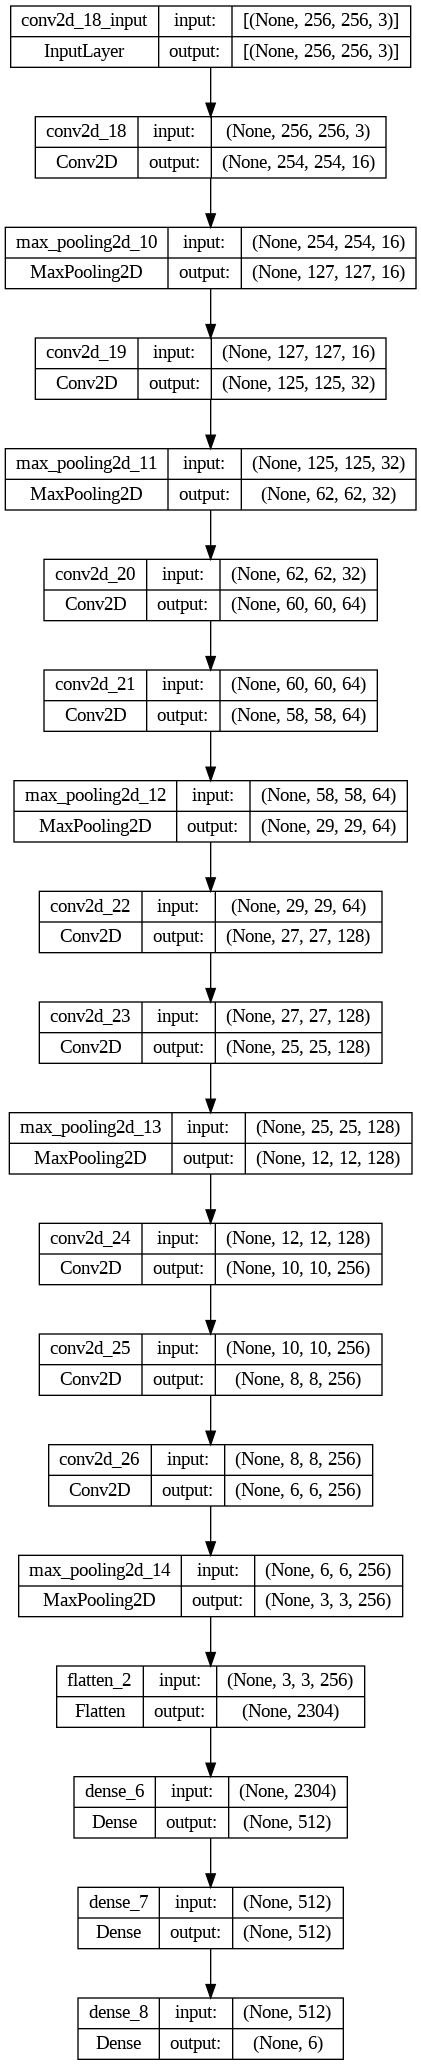

In [172]:
plot_model(model, to_file='modelo.png', show_shapes=True, show_layer_names=True)